<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Survival-Analysis-of-Adverse-Regime-Changes:" data-toc-modified-id="Survival-Analysis-of-Adverse-Regime-Changes:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Survival Analysis of Adverse Regime Changes:</a></span></li><li><span><a href="#Imports-and-reading-in-data" data-toc-modified-id="Imports-and-reading-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and reading in data</a></span></li><li><span><a href="#EDA-and-Preprocessing" data-toc-modified-id="EDA-and-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Notes:" data-toc-modified-id="Notes:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Notes:</a></span><ul class="toc-item"><li><span><a href="#Columns-to-drop:" data-toc-modified-id="Columns-to-drop:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Columns to drop:</a></span></li><li><span><a href="#Columns-to-engineer:" data-toc-modified-id="Columns-to-engineer:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Columns to engineer:</a></span></li></ul></li><li><span><a href="#TBD:-More-EDA" data-toc-modified-id="TBD:-More-EDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>TBD: More EDA</a></span></li><li><span><a href="#Dropping-columns:" data-toc-modified-id="Dropping-columns:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dropping columns:</a></span></li></ul></li><li><span><a href="#Focusing-on-duration" data-toc-modified-id="Focusing-on-duration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Focusing on duration</a></span><ul class="toc-item"><li><span><a href="#Creating-'time_begin'-and-'time_end'-features" data-toc-modified-id="Creating-'time_begin'-and-'time_end'-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Creating 'time_begin' and 'time_end' features</a></span></li><li><span><a href="#Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA" data-toc-modified-id="Data-spans-1952-03-01-to-2018-12-01---TBD:-More-EDA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA</a></span></li><li><span><a href="#Making-a-DF-of-just-the-first-country" data-toc-modified-id="Making-a-DF-of-just-the-first-country-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Making a DF of just the first country</a></span><ul class="toc-item"><li><span><a href="#Trimming-of-non-numerical-features" data-toc-modified-id="Trimming-of-non-numerical-features-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Trimming of non-numerical features</a></span></li></ul></li><li><span><a href="#Adding-earliest-date-in-dataframe-to-beginning-of-AFG-time-series" data-toc-modified-id="Adding-earliest-date-in-dataframe-to-beginning-of-AFG-time-series-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Adding earliest date in dataframe to beginning of AFG time series</a></span></li><li><span><a href="#--How-would-I-forward-fill-and-backfill-these-values-given-there's-years-and-years-of-no-events-occurring(so-0s-in-MAGFAIL,-MAGCOL,-MAGVIOL,-MAGAVE,-etc.)" data-toc-modified-id="--How-would-I-forward-fill-and-backfill-these-values-given-there's-years-and-years-of-no-events-occurring(so-0s-in-MAGFAIL,-MAGCOL,-MAGVIOL,-MAGAVE,-etc.)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>- How would I forward fill and backfill these values given there's years and years of no events occurring(so 0s in MAGFAIL, MAGCOL, MAGVIOL, MAGAVE, etc.)</a></span></li></ul></li><li><span><a href="#A-possible-solution-with-expanded-dataframe" data-toc-modified-id="A-possible-solution-with-expanded-dataframe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A possible solution with expanded dataframe</a></span></li><li><span><a href="#Feature-Engineering---TBD" data-toc-modified-id="Feature-Engineering---TBD-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering - TBD</a></span></li><li><span><a href="#Adding-more-data---TBD:-Country/region-data" data-toc-modified-id="Adding-more-data---TBD:-Country/region-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adding more data - TBD: Country/region data</a></span><ul class="toc-item"><li><span><a href="#Stock-Data-Call---Alpha-Vantage---TBD:-Add-more-stonks" data-toc-modified-id="Stock-Data-Call---Alpha-Vantage---TBD:-Add-more-stonks-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Stock Data Call - Alpha Vantage - TBD: Add more stonks</a></span></li></ul></li><li><span><a href="#Lockheed-Martin-Data" data-toc-modified-id="Lockheed-Martin-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Lockheed Martin Data</a></span><ul class="toc-item"><li><span><a href="#Box-and-whisker" data-toc-modified-id="Box-and-whisker-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Box and whisker</a></span></li><li><span><a href="#Time-series-heat-map" data-toc-modified-id="Time-series-heat-map-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Time series heat map</a></span></li><li><span><a href="#Lag-plot" data-toc-modified-id="Lag-plot-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Lag plot</a></span></li><li><span><a href="#PACF-ACF-Plots" data-toc-modified-id="PACF-ACF-Plots-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>PACF ACF Plots</a></span></li><li><span><a href="#TBD:-EDA-and-Preprocess,-Feature-Engineering" data-toc-modified-id="TBD:-EDA-and-Preprocess,-Feature-Engineering-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>TBD: EDA and Preprocess, Feature Engineering</a></span></li></ul></li><li><span><a href="#Merging-stock-and-adverse-regime-change-data" data-toc-modified-id="Merging-stock-and-adverse-regime-change-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Merging stock and adverse regime change data</a></span></li><li><span><a href="#EDA-of-stock-data---Lockheed-Martin" data-toc-modified-id="EDA-of-stock-data---Lockheed-Martin-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>EDA of stock data - Lockheed Martin</a></span><ul class="toc-item"><li><span><a href="#TBD:-Examine-by-time-slices" data-toc-modified-id="TBD:-Examine-by-time-slices-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>TBD: Examine by time slices</a></span></li><li><span><a href="#TBD:-Smoothing-methods-plots" data-toc-modified-id="TBD:-Smoothing-methods-plots-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>TBD: Smoothing methods plots</a></span></li><li><span><a href="#TBD:-ACF-and-PACF" data-toc-modified-id="TBD:-ACF-and-PACF-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>TBD: ACF and PACF</a></span></li><li><span><a href="#Anomaly-plotting" data-toc-modified-id="Anomaly-plotting-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Anomaly plotting</a></span></li></ul></li><li><span><a href="#EDA-of-merged-regime-change-variables" data-toc-modified-id="EDA-of-merged-regime-change-variables-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>EDA of merged regime change variables</a></span></li><li><span><a href="#EDA-of-Country/Region-variables" data-toc-modified-id="EDA-of-Country/Region-variables-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>EDA of Country/Region variables</a></span></li><li><span><a href="#Modeling,-Forecasting-and-comparisons" data-toc-modified-id="Modeling,-Forecasting-and-comparisons-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Modeling, Forecasting and comparisons</a></span><ul class="toc-item"><li><span><a href="#Off-moving-averages-naively" data-toc-modified-id="Off-moving-averages-naively-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Off moving averages naively</a></span></li><li><span><a href="#Dealing-with-stationarity---differencing-and-lagging,-Augmented-Dickey-Fuller" data-toc-modified-id="Dealing-with-stationarity---differencing-and-lagging,-Augmented-Dickey-Fuller-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Dealing with stationarity - differencing and lagging, Augmented Dickey-Fuller</a></span></li><li><span><a href="#Granger-Causality" data-toc-modified-id="Granger-Causality-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Granger Causality</a></span></li><li><span><a href="#ARIMA-Modeling" data-toc-modified-id="ARIMA-Modeling-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>ARIMA Modeling</a></span></li><li><span><a href="#VAR,-VARIMA,-VARIMAX(?)" data-toc-modified-id="VAR,-VARIMA,-VARIMAX(?)-13.5"><span class="toc-item-num">13.5&nbsp;&nbsp;</span>VAR, VARIMA, VARIMAX(?)</a></span></li><li><span><a href="#Monte-Carlos" data-toc-modified-id="Monte-Carlos-13.6"><span class="toc-item-num">13.6&nbsp;&nbsp;</span>Monte Carlos</a></span></li><li><span><a href="#Prophet" data-toc-modified-id="Prophet-13.7"><span class="toc-item-num">13.7&nbsp;&nbsp;</span>Prophet</a></span></li></ul></li><li><span><a href="#Framing-as-a-supervised-learning-problem" data-toc-modified-id="Framing-as-a-supervised-learning-problem-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Framing as a supervised learning problem</a></span></li><li><span><a href="#Finally:-Deep-Learning-with-LSTMs,-Embedding-of-Entities,-Autoencoders-for-Anomaly-Detection,-Markov-Models" data-toc-modified-id="Finally:-Deep-Learning-with-LSTMs,-Embedding-of-Entities,-Autoencoders-for-Anomaly-Detection,-Markov-Models-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Finally: Deep Learning with LSTMs, Embedding of Entities, Autoencoders for Anomaly Detection, Markov Models</a></span></li><li><span><a href="#Appendix:-Financial-Techniques--Portfolio-Allocation,-etc." data-toc-modified-id="Appendix:-Financial-Techniques--Portfolio-Allocation,-etc.-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Appendix: Financial Techniques- Portfolio Allocation, etc.</a></span></li><li><span><a href="#Geographical-plotting-test---just-the-most-turbulent-year" data-toc-modified-id="Geographical-plotting-test---just-the-most-turbulent-year-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Geographical plotting test - just the most turbulent year</a></span></li><li><span><a href="#Survival-analysis---TO-DO:-By-country/region" data-toc-modified-id="Survival-analysis---TO-DO:-By-country/region-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Survival analysis - TO DO: By country/region</a></span><ul class="toc-item"><li><span><a href="#First-converting-time_begin-and-time_end-to-accepted-Lifelines-format" data-toc-modified-id="First-converting-time_begin-and-time_end-to-accepted-Lifelines-format-18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>First converting time_begin and time_end to accepted Lifelines format</a></span></li><li><span><a href="#Kaplan-Meier-Fitter" data-toc-modified-id="Kaplan-Meier-Fitter-18.2"><span class="toc-item-num">18.2&nbsp;&nbsp;</span>Kaplan Meier Fitter</a></span><ul class="toc-item"><li><span><a href="#Plotting-results-in-months" data-toc-modified-id="Plotting-results-in-months-18.2.1"><span class="toc-item-num">18.2.1&nbsp;&nbsp;</span>Plotting results in months</a></span></li></ul></li><li><span><a href="#NelsonAalenFitter-for-cumulative-hazard-function" data-toc-modified-id="NelsonAalenFitter-for-cumulative-hazard-function-18.3"><span class="toc-item-num">18.3&nbsp;&nbsp;</span>NelsonAalenFitter for cumulative hazard function</a></span></li></ul></li><li><span><a href="#TO-DO:-implementing-right/left-censorship-of-birth/death-events-via.-groupby-country-and-time-resampling" data-toc-modified-id="TO-DO:-implementing-right/left-censorship-of-birth/death-events-via.-groupby-country-and-time-resampling-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>TO DO: implementing right/left censorship of birth/death events via. groupby country and time resampling</a></span></li><li><span><a href="#Geographic-plotting" data-toc-modified-id="Geographic-plotting-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Geographic plotting</a></span></li></ul></div>

# Survival Analysis of Adverse Regime Changes: 
- Dataset available at: http://www.systemicpeace.org/inscrdata.html
- Utilizing the fantastic Lifelines package for Survival Analysis and adapting examples from https://lifelines.readthedocs.io/en/latest/index.html
- Beginning EDA and survival analysis towards a study of regime changes' effects on the global market

# Imports and reading in data

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import ccovf,ccf,periodogram
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('PITF Adverse Regime Change 2018.xls', index_col=None) 

df

,COUNTRY,SCODE,CCODE,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,PTYPE,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,DESC,POLITYX,DESC2
0,Afghanistan,AFG,700,1978,4,1978,12,1979,3,2,1,4,2.5,In the wake of unrest stemming from the assass...,REV,1.0
1,Afghanistan,AFG,700,1979,4,1978,12,1979,3,2,1,4,2.5,NaN,NaN,NaN
2,Afghanistan,AFG,700,1992,4,1992,9,1996,3,4,1,4,3.0,Soviet-supported Najibullah regime falls after...,REV,1.0
3,Afghanistan,AFG,700,1993,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
4,Afghanistan,AFG,700,1994,4,1992,9,1996,3,4,1,4,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Zambia,ZAM,551,1970,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
349,Zambia,ZAM,551,1971,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
350,Zambia,ZAM,551,1972,8,1968,12,1972,3,1,3,2,2.0,NaN,NaN,NaN
351,Zambia,ZAM,551,1996,11,1996,11,1996,3,1,2,1,1.5,Constitutional amendments in May 1996 disquali...,-5,1.0


# EDA and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  353 non-null    object 
 1   SCODE    353 non-null    object 
 2   CCODE    353 non-null    int64  
 3   YEAR     353 non-null    int64  
 4   MOBEGIN  353 non-null    int64  
 5   YRBEGIN  353 non-null    int64  
 6   MOEND    353 non-null    int64  
 7   YREND    353 non-null    int64  
 8   PTYPE    353 non-null    int64  
 9   MAGFAIL  353 non-null    int64  
 10  MAGCOL   353 non-null    int64  
 11  MAGVIOL  353 non-null    int64  
 12  MAGAVE   353 non-null    float64
 13  DESC     136 non-null    object 
 14  POLITYX  136 non-null    object 
 15  DESC2    136 non-null    float64
dtypes: float64(2), int64(10), object(4)
memory usage: 44.2+ KB


In [4]:
eda_df = df.copy()

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(eda_df, title="Pandas Profiling Report")

In [6]:
# profile.to_widgets()

## Notes:
- PTYPE has Constant Value "3" 
- DESC is missing along with POLITYX and DESC2 in 217 rows, this is due to (consulting the codebook) these cells only being filled in the case of the first year of a multiyear event
- Somalia is an outlier in occurrences, but is that total distinct regime changes or years under regime change?
- 1990s are common years, a hot trend to have adverse regime changes in the 1990s
- A lot of ending and beginning in the first month and last month of the year, pointing to how this was coded?
- Should do distributions of MAG columns at least
- Drop for now

### Columns to drop:
- PTYPE constant value
- DESC2 can be dropped as redundant to DESC
- SCODE is redundant to COUNTRY as is CCODE
- Drop DESC for now, can examine with NLP later

### Columns to engineer:
- YEAR needs to be resampled to Daily data somehow 
    - (groupby country --> resample with fill and inserts?)
- YR and MO BEGIN AND END can be made into time beginning and time ending
- MAGCOL, VIOL, FAIL, AVE need to be 
    - Interpolated
- POLITYX is Unsupported 
    - Needs to be recoded
    - Check what the values mean in codebook
    - And filled where NaN 

## TBD: More EDA

In [7]:
eda_df.POLITYX.value_counts()

SF     26
-14    13
-9     12
-7     10
-15    10
-10     9
REV     9
-5      8
-11     8
-12     8
DIS     6
-6      5
-8      5
-13     5
-16     1
-18     1
Name: POLITYX, dtype: int64

## Dropping columns: 

In [8]:
eda_df = eda_df.drop(['PTYPE', 'DESC2', "SCODE", "CCODE", "DESC"],axis=1)

eda_df.columns

Index(['COUNTRY', 'YEAR', 'MOBEGIN', 'YRBEGIN', 'MOEND', 'YREND', 'MAGFAIL',
       'MAGCOL', 'MAGVIOL', 'MAGAVE', 'POLITYX'],
      dtype='object')

# Focusing on duration
- Time of beginning and end of regime change through YRBEGIN, YREND, MOBEGIN, MOEND features are of key interest

## Creating 'time_begin' and 'time_end' features
- These capture both month and year as Pandas datetime features
- Problem: Always set to first day of month

In [9]:
eda_df['time_begin'] = pd.to_datetime((eda_df['YRBEGIN'].astype(str)  + "-" +eda_df['MOBEGIN'].astype(str)), format='%Y-%m', errors="coerce")
eda_df['time_end'] = pd.to_datetime((eda_df['YREND'].astype(str)  + "-" +eda_df['MOEND'].astype(str)),  errors='coerce')
eda_df['YEAR'] = pd.to_datetime(eda_df['YEAR'].astype(str), errors="coerce")
eda_df.head(10)

,COUNTRY,YEAR,MOBEGIN,YRBEGIN,MOEND,YREND,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,POLITYX,time_begin,time_end
0,Afghanistan,1978-01-01,4,1978,12,1979,2,1,4,2.5,REV,1978-04-01,1979-12-01
1,Afghanistan,1979-01-01,4,1978,12,1979,2,1,4,2.5,NaN,1978-04-01,1979-12-01
2,Afghanistan,1992-01-01,4,1992,9,1996,4,1,4,3.0,REV,1992-04-01,1996-09-01
3,Afghanistan,1993-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
4,Afghanistan,1994-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
5,Afghanistan,1995-01-01,4,1992,9,1996,4,1,4,3.0,NaN,1992-04-01,1996-09-01
6,Afghanistan,1996-01-01,4,1992,9,1996,2,1,2,1.5,NaN,1992-04-01,1996-09-01
7,Afghanistan,2001-01-01,11,2001,6,2002,4,1,4,3.0,SF,2001-11-01,2002-06-01
8,Afghanistan,2002-01-01,11,2001,6,2002,4,1,4,3.0,NaN,2001-11-01,2002-06-01
9,Albania,1996-01-01,5,1996,5,1996,1,3,1,1.5,-5,1996-05-01,1996-05-01


- Dropping source beginning and end date columns 

In [10]:
eda_df = eda_df.drop(['MOBEGIN','YRBEGIN','MOEND','YREND'],axis=1)

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   COUNTRY     353 non-null    object        
 1   YEAR        353 non-null    datetime64[ns]
 2   MAGFAIL     353 non-null    int64         
 3   MAGCOL      353 non-null    int64         
 4   MAGVIOL     353 non-null    int64         
 5   MAGAVE      353 non-null    float64       
 6   POLITYX     136 non-null    object        
 7   time_begin  353 non-null    datetime64[ns]
 8   time_end    334 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 24.9+ KB


## Data spans 1952-03-01 to 2018-12-01 - TBD: More EDA

In [11]:
eda_df.time_begin.min()

Timestamp('1952-03-01 00:00:00')

In [12]:
eda_df.time_end.max()

Timestamp('2018-12-01 00:00:00')

In [13]:
eda_df['event_oc'] = 1

eda_df.head()

,COUNTRY,YEAR,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,POLITYX,time_begin,time_end,event_oc
0,Afghanistan,1978-01-01,2,1,4,2.5,REV,1978-04-01,1979-12-01,1
1,Afghanistan,1979-01-01,2,1,4,2.5,NaN,1978-04-01,1979-12-01,1
2,Afghanistan,1992-01-01,4,1,4,3.0,REV,1992-04-01,1996-09-01,1
3,Afghanistan,1993-01-01,4,1,4,3.0,NaN,1992-04-01,1996-09-01,1
4,Afghanistan,1994-01-01,4,1,4,3.0,NaN,1992-04-01,1996-09-01,1


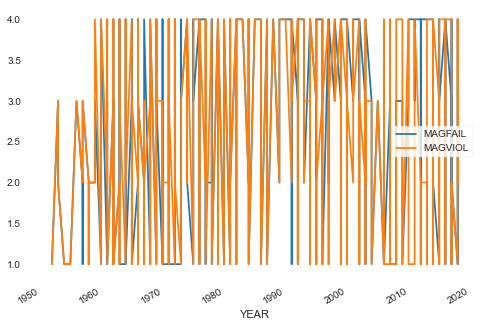

In [14]:
t_df = eda_df.copy()

t_df = t_df.set_index("YEAR")

t_df[['MAGFAIL', "MAGVIOL"]].plot()

## Making a DF of just the first country

In [15]:
afg_df = eda_df[eda_df['COUNTRY'] == "Afghanistan"]

afg_df.head(10)

,COUNTRY,YEAR,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,POLITYX,time_begin,time_end,event_oc
0,Afghanistan,1978-01-01,2,1,4,2.5,REV,1978-04-01,1979-12-01,1
1,Afghanistan,1979-01-01,2,1,4,2.5,NaN,1978-04-01,1979-12-01,1
2,Afghanistan,1992-01-01,4,1,4,3.0,REV,1992-04-01,1996-09-01,1
3,Afghanistan,1993-01-01,4,1,4,3.0,NaN,1992-04-01,1996-09-01,1
4,Afghanistan,1994-01-01,4,1,4,3.0,NaN,1992-04-01,1996-09-01,1
5,Afghanistan,1995-01-01,4,1,4,3.0,NaN,1992-04-01,1996-09-01,1
6,Afghanistan,1996-01-01,2,1,2,1.5,NaN,1992-04-01,1996-09-01,1
7,Afghanistan,2001-01-01,4,1,4,3.0,SF,2001-11-01,2002-06-01,1
8,Afghanistan,2002-01-01,4,1,4,3.0,NaN,2001-11-01,2002-06-01,1


In [16]:
len(afg_df)

9

### Trimming of non-numerical features

In [17]:
afg_df = afg_df.drop(["POLITYX", "time_begin","time_end"],axis=1)
afg_df = afg_df.set_index("YEAR")

afg_df

,COUNTRY,MAGFAIL,MAGCOL,MAGVIOL,MAGAVE,event_oc
YEAR,,,,,,
1978-01-01,Afghanistan,2,1,4,2.5,1
1979-01-01,Afghanistan,2,1,4,2.5,1
1992-01-01,Afghanistan,4,1,4,3.0,1
1993-01-01,Afghanistan,4,1,4,3.0,1
1994-01-01,Afghanistan,4,1,4,3.0,1
1995-01-01,Afghanistan,4,1,4,3.0,1
1996-01-01,Afghanistan,2,1,2,1.5,1
2001-01-01,Afghanistan,4,1,4,3.0,1
2002-01-01,Afghanistan,4,1,4,3.0,1


## Adding earliest date in dataframe to beginning of AFG time series
- This means adding latest date in dataframe to each series is possible, but:
##    - How would I forward fill and backfill these values given there's years and years of no events occurring(so 0s in MAGFAIL, MAGCOL, MAGVIOL, MAGAVE, etc.)

# A possible solution with expanded dataframe

In [18]:
#create copy of df at present state
group_df = eda_df.copy()

#drop non numeric columns
group_df = group_df.drop(["POLITYX", "time_begin","time_end"],axis=1)

# group by country into groupby object
group = group_df.groupby(["COUNTRY"])

In [19]:
from functools import reduce

#empty list of dataframes to be populated with groupby objects' dfs when modified
grouped_dfs = []

#iterate over groupby objects' component dataframes
for k in group.groups.keys():
    #reference to dataframe
    gr = group.get_group(k)

    #append 1950 and 2019 as beginning and end years
    gr = gr.append(pd.Series([k,'2019-01-01',0,0,0,0,0], index=gr.columns),ignore_index=True) #adding first year
    gr.loc[-1] = [k, '1950-01-01', 0,0,0,0,0]  # adding final year
    gr.index = gr.index + 1  # shifting index to match
    gr.sort_index(inplace=True) #sorting index back to sequential years
    
    #setting index to datetime YEAR with AS(year start) freq, fill empty years with 0
    gr =gr.set_index("YEAR").asfreq('AS')
    gr = gr.fillna(0)
    
    #assign country as boolean instead of text variable with one hot encoding
    gr = pd.get_dummies(gr, columns=['COUNTRY'], prefix='', prefix_sep='')
    
    #dropping a weird column that comes up 
    gr = gr.drop('0', axis=1, errors='ignore')
    
    #renaming columns programmatically to not collide in merge, appending name of country to numerical vals
    gr.rename(columns = {'MAGFAIL':'MAGFAIL_'+k, "MAGCOL": "MAGCOL_"+k,"MAGAVE":"MAGAVE_"+k,"MAGVIOL": "MAGVIOL_"+k,
                         "event_oc": "event_oc_"+k}, inplace = True)
    gr = gr.reset_index()
    
    #add iterated df to dfs list
    grouped_dfs.append(gr)

#merge all dfs on YEAR and set index back to datetime 
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['YEAR'],
                                            how='outer'), grouped_dfs).set_index("YEAR")

In [20]:
df_merged

,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,Afghanistan,MAGFAIL_Albania,MAGCOL_Albania,MAGVIOL_Albania,MAGAVE_Albania,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
YEAR,,,,,,,,,,,,,,,,,,,,,
1950-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1951-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1952-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1953-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1954-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2016-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2017-01-01,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
df_merged = df_merged.resample("B").ffill()
#"d" for daily
df_merged

,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,Afghanistan,MAGFAIL_Albania,MAGCOL_Albania,MAGVIOL_Albania,MAGAVE_Albania,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
YEAR,,,,,,,,,,,,,,,,,,,,,
1949-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_merged.index = df_merged.index.rename("d")

In [23]:
df_merged

,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,Afghanistan,MAGFAIL_Albania,MAGCOL_Albania,MAGVIOL_Albania,MAGAVE_Albania,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
d,,,,,,,,,,,,,,,,,,,,,
1949-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering - TBD

# Adding more data - TBD: Country/region data

## Stock Data Call - Alpha Vantage - TBD: Add more stonks

In [89]:
# import requests

# API_URL = "https://www.alphavantage.co/query" 
# symbol = 'LMT'

# data = { "function": "TIME_SERIES_DAILY", 
#     "symbol": symbol,
#     "outputsize" : "full",
#     "datatype": "csv", 
#     "apikey": apikey } 

# response = requests.get(API_URL, data)
# # response.json()
# #LMT

# Lockheed Martin Data

In [99]:
import io
import os
import csv
# urlData = response.content
#https://stackoverflow.com/questions/45978295/saving-a-downloaded-csv-file-using-python used

# with open('lmt.csv', 'w') as f:
#     writer = csv.writer(f)
#     for line in response.iter_lines():
#         writer.writerow(line.decode('utf-8').split(','))

lmt = pd.read_csv("lmt.csv")

lmt

,timestamp,open,high,low,close,volume
0,2020-07-09,348.00,349.4850,339.18,339.96,1820253.0
1,2020-07-08,353.50,357.3000,348.63,350.23,1962500.0
2,2020-07-07,362.59,362.9200,352.78,353.27,1394900.0
3,2020-07-06,366.48,367.1200,360.84,362.59,1202300.0
4,2020-07-02,363.53,366.0699,360.69,362.00,1395705.0
...,...,...,...,...,...,...
5041,2000-07-13,25.06,26.0600,25.00,25.00,836100.0
5042,2000-07-12,24.19,25.1900,24.19,25.06,521500.0
5043,2000-07-11,24.94,25.0600,24.56,24.75,620000.0
5044,2000-07-10,25.31,25.4400,25.00,25.19,612000.0


In [100]:
lmt.rename(columns={"timestamp":"d"},inplace=True)


In [101]:
lmt.index

RangeIndex(start=0, stop=5046, step=1)

In [102]:
lmt = lmt.set_index(pd.to_datetime(lmt['d'])).sort_index()

lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='d', length=5046, freq=None)

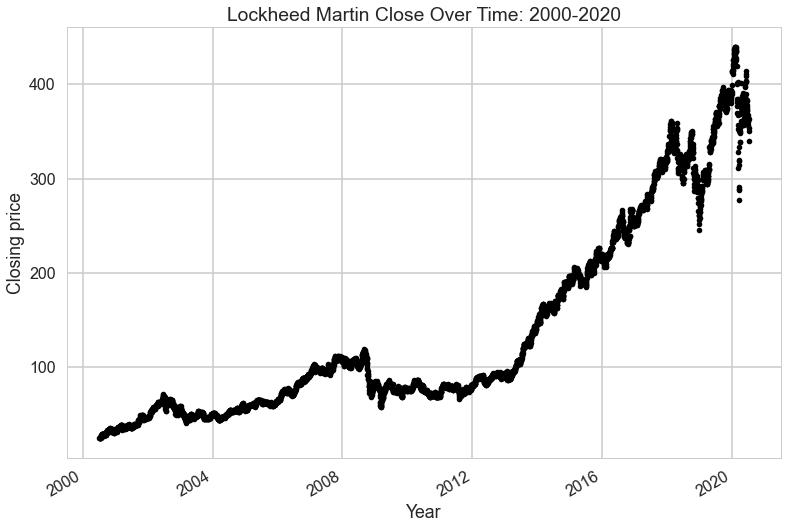

In [212]:
lmt['close'].plot(style='k.')
ax = plt.gca()
ax.set_title("Lockheed Martin Close Over Time: 2000-2020")
ax.set_xlabel("Year")
ax.set_ylabel("Closing price")
plt.savefig("lmttimeseries20002020.png")
plt.show()

In [197]:
lmt['close'].describe()

count    5033.000000
mean      137.604949
std       103.610883
min        24.750000
25%        62.910000
50%        88.210000
75%       202.120000
max       439.850000
Name: close, dtype: float64

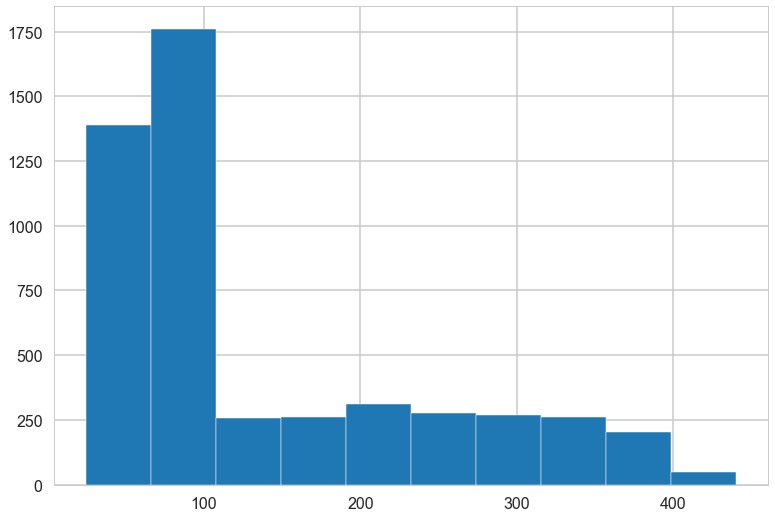

In [199]:
lmt['close'].hist()

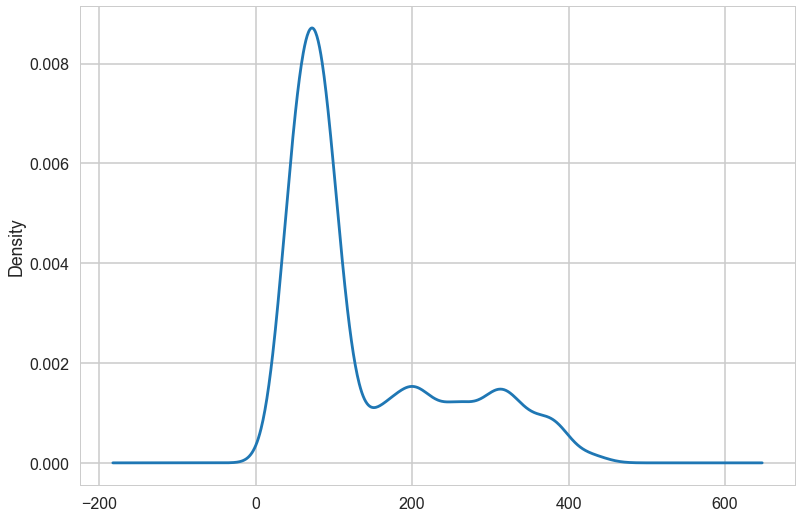

In [200]:
lmt['close'].plot(kind='kde')

## Box and whisker

## Time series heat map

## Lag plot

## PACF ACF Plots

## TBD: EDA and Preprocess, Feature Engineering

In [103]:
stock_regime_df = df_merged['2000-07-07':'2018-12-31']

stock_regime_df

,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,Afghanistan,MAGFAIL_Albania,MAGCOL_Albania,MAGVIOL_Albania,MAGAVE_Albania,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
stock_regime_df

,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,Afghanistan,MAGFAIL_Albania,MAGCOL_Albania,MAGVIOL_Albania,MAGAVE_Albania,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
trunc_lmt = lmt.copy()

In [106]:
trunc_lmt

,d,open,high,low,close,volume
d,,,,,,
2000-07-07,2000-07-07,25.13,25.38,24.81,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.44,25.00,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.06,24.56,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.19,24.19,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.06,25.00,25.00,836100.0
...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
trunc_lmt = trunc_lmt['2000-07-07':'2019-01-01']

trunc_lmt

,d,open,high,low,close,volume
d,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0
...,...,...,...,...,...,...
2018-12-24,2018-12-24,253.03,254.6300,245.0100,245.22,1515428.0
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0


In [108]:
trunc_lmt.index

DatetimeIndex(['2000-07-07', '2000-07-10', '2000-07-11', '2000-07-12',
               '2000-07-13', '2000-07-14', '2000-07-17', '2000-07-18',
               '2000-07-19', '2000-07-20',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='d', length=4650, freq=None)

# Merging stock and adverse regime change data

In [109]:
stonks = pd.merge(trunc_lmt, stock_regime_df, left_index=True, right_index=True)

stonks

,d,open,high,low,close,volume,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,2018-12-24,253.03,254.6300,245.0100,245.22,1515428.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
stonks.drop('d', axis=1, inplace=True)

stonks

,open,high,low,close,volume,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,...,MAGVIOL_Zambia,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.3800,24.8100,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-10,25.31,25.4400,25.0000,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-11,24.94,25.0600,24.5600,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-12,24.19,25.1900,24.1900,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-07-13,25.06,26.0600,25.0000,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,253.03,254.6300,245.0100,245.22,1515428.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-26,246.31,251.8900,241.1796,251.62,1797958.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-27,249.25,259.7900,248.2000,259.79,2201422.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
ave_col = [col for col in plot_df.columns if 'MAGAVE' in col]

ave_col

['MAGAVE_Afghanistan',
 'MAGAVE_Albania',
 'MAGAVE_Algeria',
 'MAGAVE_Angola',
 'MAGAVE_Argentina',
 'MAGAVE_Armenia',
 'MAGAVE_Azerbaijan',
 'MAGAVE_Bangladesh',
 'MAGAVE_Belarus',
 'MAGAVE_Benin',
 'MAGAVE_Bosnia',
 'MAGAVE_Brazil',
 'MAGAVE_Burkina Faso',
 'MAGAVE_Burundi',
 'MAGAVE_Cambodia',
 'MAGAVE_Central African Republic',
 'MAGAVE_Chad',
 'MAGAVE_Chile',
 'MAGAVE_Comoros',
 'MAGAVE_Congo-Brazzaville',
 'MAGAVE_Congo-Kinshasa',
 'MAGAVE_Cuba',
 'MAGAVE_Cyprus',
 'MAGAVE_Czechoslovakia',
 'MAGAVE_Dominican Republic',
 'MAGAVE_Ecuador',
 'MAGAVE_El Salvador',
 'MAGAVE_Equatorial Guinea',
 'MAGAVE_Ethiopia',
 'MAGAVE_Fiji',
 'MAGAVE_France',
 'MAGAVE_Gambia',
 'MAGAVE_Ghana',
 'MAGAVE_Greece',
 'MAGAVE_Guinea-Bissau',
 'MAGAVE_Guyana',
 'MAGAVE_Haiti',
 'MAGAVE_Hungary',
 'MAGAVE_Indonesia',
 'MAGAVE_Iran',
 'MAGAVE_Iraq',
 'MAGAVE_Ivory Coast',
 'MAGAVE_Jordan',
 'MAGAVE_Kenya',
 'MAGAVE_Korea South',
 'MAGAVE_Laos',
 'MAGAVE_Lebanon',
 'MAGAVE_Lesotho',
 'MAGAVE_Liberia',
 'MAG

In [112]:
stonks['mean_ave'] = stonks[ave_col].mean(axis=1)

stonks.head(20)

,open,high,low,close,volume,MAGFAIL_Afghanistan,MAGCOL_Afghanistan,MAGVIOL_Afghanistan,MAGAVE_Afghanistan,event_oc_Afghanistan,...,MAGAVE_Zambia,event_oc_Zambia,Zambia,MAGFAIL_Zimbabwe,MAGCOL_Zimbabwe,MAGVIOL_Zimbabwe,MAGAVE_Zimbabwe,event_oc_Zimbabwe,Zimbabwe,mean_ave
d,,,,,,,,,,,,,,,,,,,,,
2000-07-07,25.13,25.38,24.81,25.31,744700.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-10,25.31,25.44,25.00,25.19,612000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-11,24.94,25.06,24.56,24.75,620000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-12,24.19,25.19,24.19,25.06,521500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-13,25.06,26.06,25.00,25.00,836100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-14,25.88,26.56,25.81,26.38,1902000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-17,26.50,26.50,25.25,25.38,1216800.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-18,25.50,25.50,24.94,25.31,1261200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163
2000-07-19,25.25,25.44,24.88,25.38,900000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151163


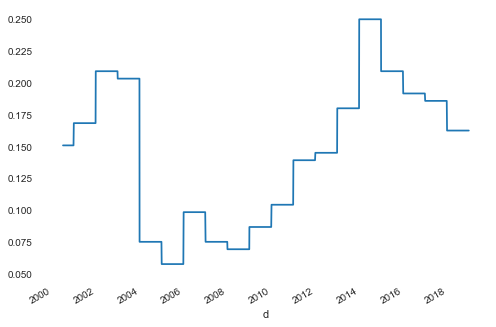

In [113]:
stonks['mean_ave'].plot()

# EDA of stock data - Lockheed Martin

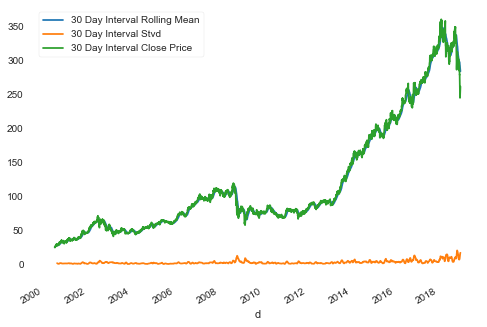

In [114]:
stonks.close.rolling(30).mean().plot(label="30 Day Interval Rolling Mean")
stonks.close.rolling(30).std().plot(label="30 Day Interval Stvd")
stonks.close.plot(label="30 Day Interval Close Price")
plt.legend()

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


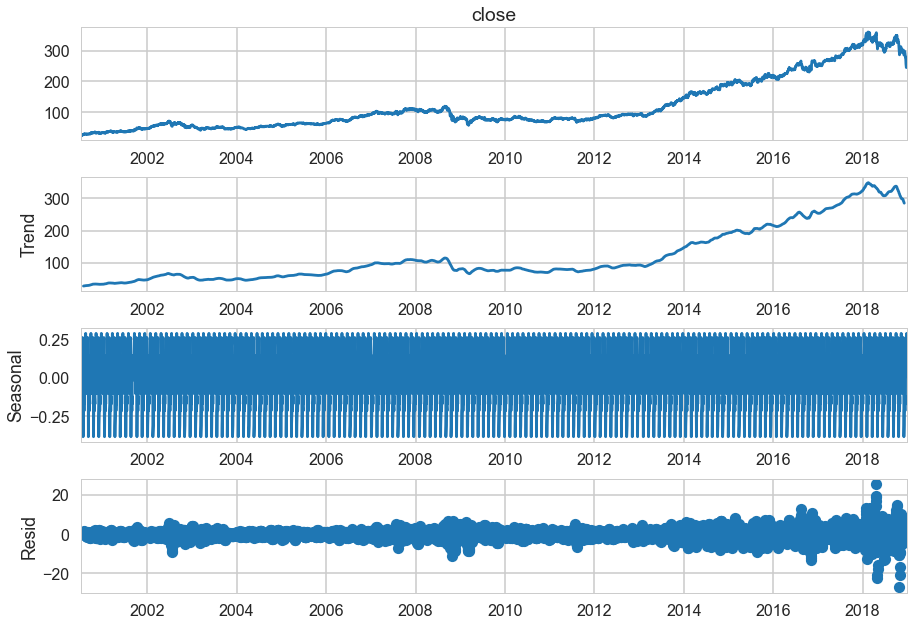

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(stonks.close, freq=30)

fig = dec.plot()

plt.show()

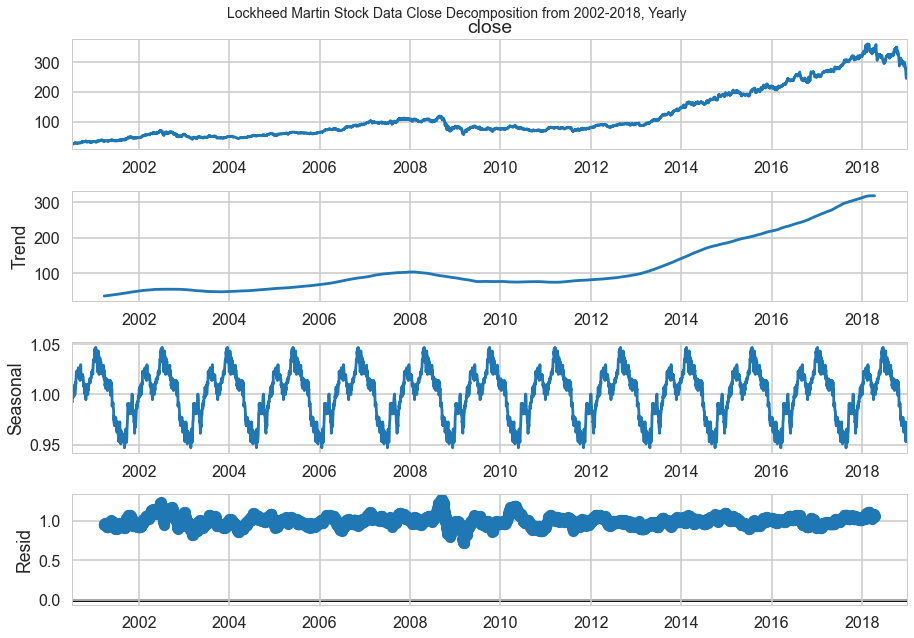

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.style as style 

style.use('seaborn-poster')

dec = seasonal_decompose(stonks.close, period=365, model='mul')

fig= dec.plot()
plt.suptitle('Lockheed Martin Stock Data Close Decomposition from 2002-2018, Yearly',horizontalalignment='center', verticalalignment="bottom",fontsize=14)
plt.savefig("OG_timeseries.png")
plt.tight_layout()
plt.show()

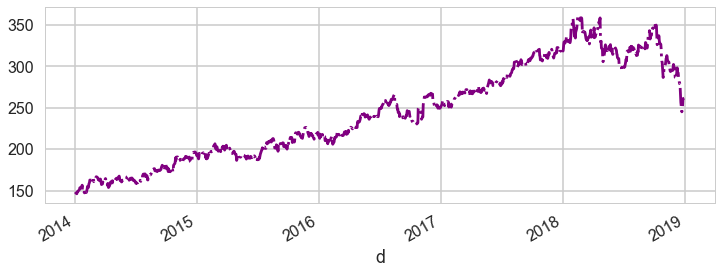

In [202]:
stonks['close']['2014-01-01':'2018-12-31'].plot(figsize=(12,4),ls='-.',c='purple')
plt.show()

## TBD: Examine by time slices
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

## TBD: Smoothing methods plots

## TBD: ACF and PACF

## Anomaly plotting

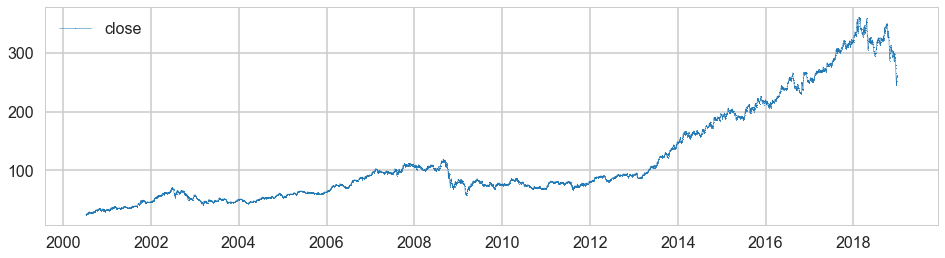

In [170]:
from adtk.visualization import plot

close = stonks.close
plot(close)

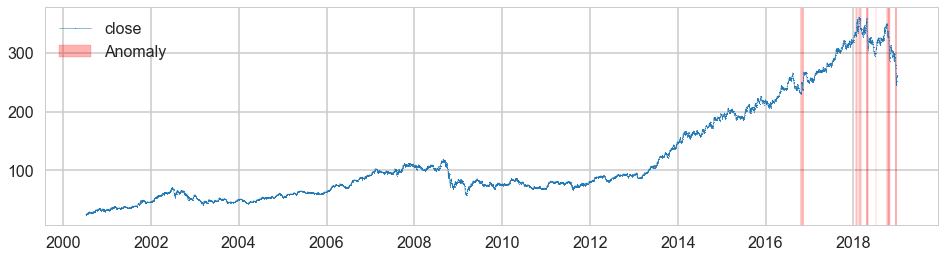

In [172]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(close)
plot(close, anomaly=anomalies, anomaly_color='red');

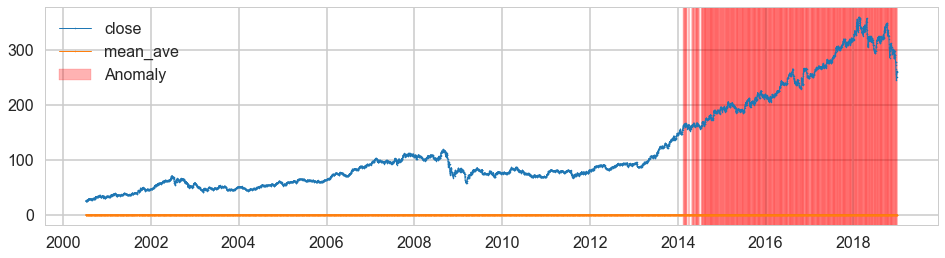

In [174]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=2))
anomalies = min_cluster_detector.fit_detect(stonks[['close','mean_ave']])
plot(stonks[['close', 'mean_ave']], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')

# EDA of merged regime change variables

# EDA of Country/Region variables

# Modeling, Forecasting and comparisons

## Off moving averages naively

## Dealing with stationarity - differencing and lagging, Augmented Dickey-Fuller

## Granger Causality

## ARIMA Modeling

## VAR, VARIMA, VARIMAX(?)

## Monte Carlos

## Prophet

# Framing as a supervised learning problem

# Finally: Deep Learning with LSTMs, Embedding of Entities, Autoencoders for Anomaly Detection, Markov Models

# Appendix: Financial Techniques- Portfolio Allocation, etc.

# Geographical plotting test - just the most turbulent year
- Code adapted from https://medium.com/datadriveninvestor/visualising-geospatial-data-with-python-d3b1c519f31

In [ ]:
# import folium
# import pandas as pd
# #Setting up the country co-ordinates
# country_geo = 'world-countries.json'

In [ ]:
# #looking for most common year to plot
# df.YEAR.value_counts()

In [ ]:
# crisis_year = 1996

# mask = df['YEAR'].isin([crisis_year])

# # apply our mask
# stage = df[mask]
# stage.head()

In [ ]:
# #Creating a data frame with just the country codes and the values we want plotted.
# data_to_plot = stage[['SCODE','MAGVIOL']]
# data_to_plot.head()

In [ ]:
# # Setup a folium map at a high-level zoom 
# map = folium.Map(location=[50, 0], zoom_start=1.25)

# # choropleth maps bind Pandas Data Frames and json geometries. 
# #This allows us to quickly visualize data combinations
# map.choropleth(geo_data=country_geo, data=data_to_plot,
#              columns=['SCODE', 'MAGVIOL'],
#              key_on='feature.id',
#              fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
#              legend_name='Magnitude of Violence out of 4 involved in Adverse Regime Change Event')

# map.save('index.html')
# # Import the Folium interactive html file


# from IPython.display import HTML
# HTML('<iframe src=index.html width=700 height=450></iframe>')

# Survival analysis - TO DO: By country/region
## First converting time_begin and time_end to accepted Lifelines format

In [ ]:
# from lifelines.utils import datetimes_to_durations

# start_dates = dum_df['time_begin'].to_list()
# end_dates = dum_df['time_end'].to_list()

# T, E = datetimes_to_durations(start_dates, end_dates, freq="M")

In [ ]:
# start_dates

In [ ]:
# end_dates

## Kaplan Meier Fitter
- Estimate of the survival function, taking T as a random lifetime taken from population under study (time a couple is married, user time to enter a webpage - an infinite time if a user never does, etc.) that defines the probability of surviving past T
    - http://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

In [ ]:
# from lifelines import KaplanMeierFitter
# kmf = KaplanMeierFitter()
# kmf.fit(T, event_observed=E)

### Plotting results in months

In [ ]:
# kmf.survival_function_.plot()

- With confidence intervals

In [ ]:
# kmf.plot()
# plt.savefig("kmf_conf_plot.png")
# plt.show()

- Time at which 50% of regime changes will have ended

In [ ]:
# kmf.median_survival_time_

## NelsonAalenFitter for cumulative hazard function

In [ ]:
# from lifelines import NelsonAalenFitter
# naf = NelsonAalenFitter()

# naf.fit(T,event_observed=E)

In [ ]:
# print(naf.cumulative_hazard_.head())
# naf.plot()

# TO DO: implementing right/left censorship of birth/death events via. groupby country and time resampling

# Geographic plotting

In [ ]:
# it is a surprise tool that will be useful later meme goes here
# from folium.plugins import TimeSliderChoropleth